# Haberman Survival Dataset EDA

Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.
Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of 
Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

Missing Attribute Values: None 



30=Age

64=Operation_Year

1= no of axil_nodes:a lymph node in the armpit region that drains lymph from the brest and nearby areas

1=Surv_status

# Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data=pd.read_csv(r'C:\Users\DELL\Desktop\assignment\1.haberman\haberman.csv')

In [3]:
data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
###renaming the data columns
data.rename(columns={'30':'age','64':'op_year','1':'axil_nodes','1.1':'surv_status'},inplace=True)

data["surv_status"]=data["surv_status"].map({1:"yes",2:"no"})

In [5]:
data.describe()

,age,op_year,axil_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


# conclusion

1. We have 4 columns "age","op_year","axil_nodes"and "surv_status"

2. As we can see clearly, no data is missing

3. The min age of  patient is 30 and max is 83 with median age of 52

4. As we can clearly see 25% of patient have no lymph nodes,
   50%-75% have  max number of lymph nodes 1 and 75% have 4 
   Also 52 which is max number of lymph nodes seems to be outlier
 
5. We have very short interval for operation year in range of 62-69 year with std of 3.25 

In [6]:
data["surv_status"].value_counts()


yes    224
no      81
Name: surv_status, dtype: int64

1. The above data clearly signifies that max no of patients survived 
2. It is  imbalance dataset

In [7]:
data.columns

Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')

# Univariant analysis: PDF, CDF, Box plot, Violin Plot

Univariate analysis is the simplest form of analyzing data. 

“Uni” means “one”, "variate" means "variable or numeric variable"

so, in other words your data has only one variable. 

It doesn't deal with causes or relationships (unlike regression)

and it's major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

# 1.1 Survival status

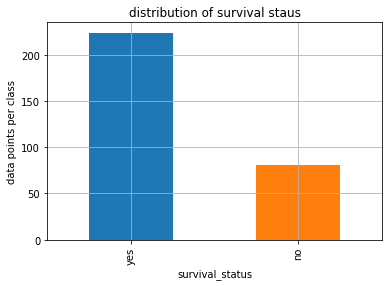

Number of patients who survived= 224 ( 73.443 %)
Number of patients who did not survived= 224 ( 26.557 %)


In [8]:
surv_status_distribution=data["surv_status"].value_counts()
surv_status_distribution.plot(kind="bar")
plt.xlabel("survival_status")
plt.ylabel("data points per class")
plt.title("distribution of survival staus")
plt.grid()
plt.show()

pos_surv_status=len(data.loc[data["surv_status"]=="yes"])
neg_surv_status=len(data.loc[data["surv_status"]=="no"])
print("Number of patients who survived=",pos_surv_status,"(",np.round((pos_surv_status/data["surv_status"].shape[0]*100),3),"%)")
print("Number of patients who did not survived=",pos_surv_status,"(",np.round((neg_surv_status/data["surv_status"].shape[0]*100),3),"%)")



# 1.1.1 : Age

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


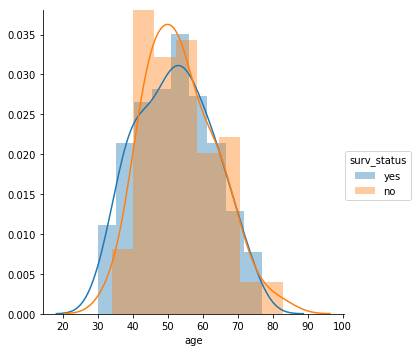

In [26]:
#pdf 
sns.FacetGrid(data, hue="surv_status", size=5) \
    .map(sns.distplot, "age") \
    .add_legend();
plt.show();


Conclusion:
    
1.Most patients in the age betweeen 40-70 show mixed behaviours


 ***** pdf and bin_edges  for pos_surv status******** 
[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
                               
 ***** pdf and bin_edges for neg_surv status******** 
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


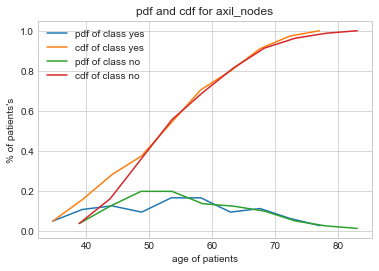

In [79]:
# cdf gives you cummulative probability associated with a function
# Cumulative sum of area under curve upto gives you cdf
# Here, Class "yes" means survived
# Class "no" means not survived
pos_surv_status=data.loc[data["surv_status"]=="yes"]
neg_surv_status=data.loc[data["surv_status"]=="no"]

label = ["pdf of class yes ","cdf of class yes", "pdf of class no", "cdf of class no"]

counts, bin_edges = np.histogram(pos_surv_status['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
plt.title("pdf and cdf for age")
plt.ylabel("% of patients's")
print(" ***** pdf and bin_edges  for pos_surv status******** ")

print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)




counts, bin_edges = np.histogram(neg_surv_status['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("                               ")
print(" ***** pdf and bin_edges for neg_surv status******** ")

print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("age of patients")
plt.legend(label)

plt.show()



Conclusion:
1. When the age of the patients is less than 47 we can see that there is liitle more chance of
 
   survival who have lower age

2. And the rest of the data is highly messed up

# 1.1.2 :operation year

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


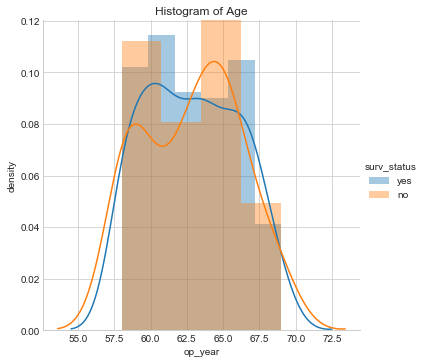

In [60]:
#pdf 
sns.FacetGrid(data,hue="surv_status",size=5)\
    .map(sns.distplot, "op_year")\
    .add_legend();
    
plt.title("Histogram of Age")
plt.ylabel("density")
plt.show()

 ***** pdf and bin_edges  for pos_surv status******** 
[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
                               
 ***** pdf and bin_edges for neg_surv status******** 
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


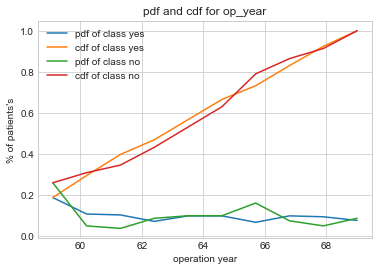

In [80]:
counts, bin_edges = np.histogram(pos_surv_status['op_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
plt.title("pdf and cdf for op_year")
plt.ylabel("% of patients's")
print(" ***** pdf and bin_edges  for pos_surv status******** ")

print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)




counts, bin_edges = np.histogram(neg_surv_status['op_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("                               ")
print(" ***** pdf and bin_edges for neg_surv status******** ")

print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("operation year")
plt.legend(label)

plt.show()



Conclusion:

most of the data points in both the classes are overlapping

so we cannot decide from above plot whether op year is a factor of survival status or not

# 1.1.3 Axil Nodes

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


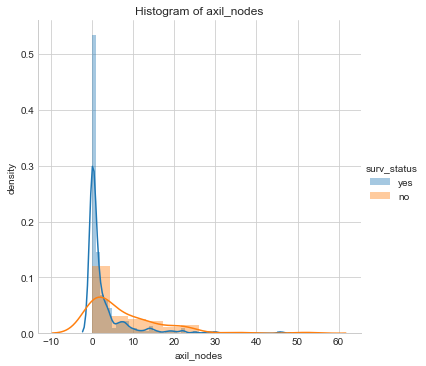

In [62]:
#pdf 
sns.FacetGrid(data,hue="surv_status",size=5)\
    .map(sns.distplot, "axil_nodes")\
    .add_legend();
plt.title("Histogram of axil_nodes")
plt.ylabel("density")
plt.show()

Conclusion: 
1.From above pot we can see that lesser the number of axil_nodes, higher is the chance of survival

2.Probabily 54% people survived who had 0-5 axlil_nodes and 12% died as well



 ***** pdf and bin_edges  for pos_surv status******** 
[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
                               
 ***** pdf and bin_edges for neg_surv status******** 
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


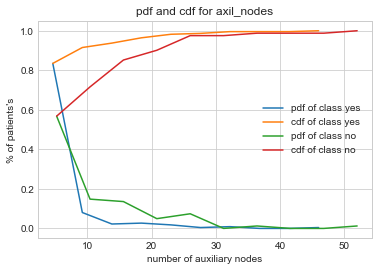

In [81]:


counts, bin_edges = np.histogram(pos_surv_status['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
plt.title("pdf and cdf for axil_nodes")
plt.ylabel("% of patients's")

print(" ***** pdf and bin_edges  for pos_surv status******** ")

print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)




counts, bin_edges = np.histogram(neg_surv_status['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("                               ")
print(" ***** pdf and bin_edges for neg_surv status******** ")

print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("number of auxiliary nodes")
plt.legend(label)

plt.show()



Conclusion:

1From plot we can see that when number of nodes is less than 10 the chances of survival is about

 95%, however 70% of them died too in this range of number of axil_nodes 

2.When number of axil_nodes is in between 10-20 chances of survival is app 2%
 
 while  chances of death is  app 18%
 
3.Finally we can conclude that higher the number of auxiliary nodes higher is the cahnces of death 

# Box plot and violin plot

# 1.2.1 Age

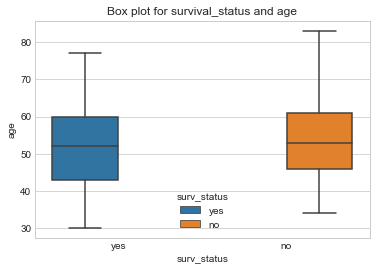

In [85]:
#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='surv_status',y='age', data=data, hue= "surv_status").set_title("Box plot for survival_status and age")
plt.show()

Conclusion: Both the plot have almoost same interquantle range of 45-60 and median of 58


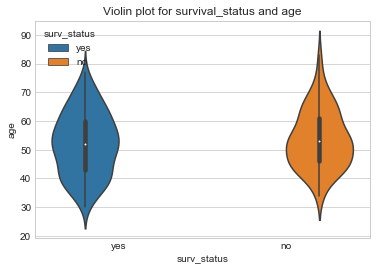

In [86]:
sns.violinplot(data=data,x="surv_status",y="age", hue="surv_status")
plt.title("Violin plot for survival_status and age")
plt.show()

Conclusion: Both the plot have almoost same interquantle range of 45-60 and median of approx 52.

But pdf of the both the classes is slightly different



# 1.2.2 op_year

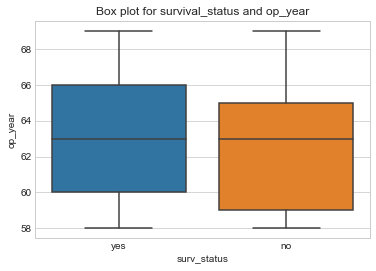

In [87]:
sns.boxplot(x='surv_status',y='op_year', data=data).set_title("Box plot for survival_status and op_year")
plt.show()

Observation:
1.Median of the plot the plot is almost same i.e. 63,

2.however interquantle range of class="yes"  is 60-66

while interquantile range of class="no" is approx 57 to 65 which is not much different

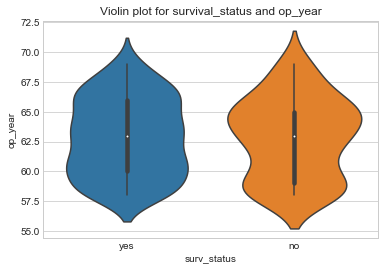

In [88]:
sns.violinplot(data=data,x="surv_status",y="op_year")
plt.title("Violin plot for survival_status and op_year")
plt.show()

Conclusion:
1 . Again both the classes have approximately same interquantile range of 60-66 and median

but diff pdf

# 1.2.3 axil_nodes

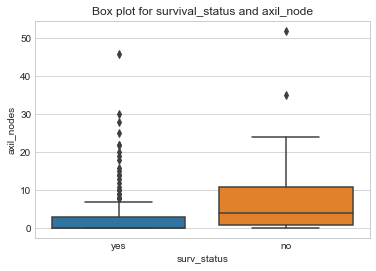

In [89]:
sns.boxplot(x='surv_status',y='axil_nodes', data=data).set_title("Box plot for survival_status and axil_node")
plt.show()

Conclusion:
 1.interquantile range is 0-4 for class="yes" and 1-11 for class="no"

this clearly shows that higher the no of axil nodes more is the chances of death

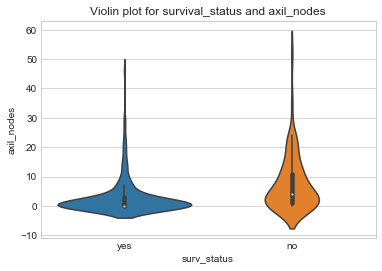

In [90]:
sns.violinplot(data=data,x="surv_status",y="axil_nodes")
plt.title("Violin plot for survival_status and axil_nodes")
plt.show()

Conclusion:
1, Most of the patients(approx 80%) who survived had number of axil nodes = 0-5

and few(approx 60%) died too who had number of axil nodes=1-10

# Final Conclusion From Univaraiant Analysis

1. Most of the point in both the classes of survival status overlap on each other for feature "age" and "op_year".

2. However for the feature of axil_nodes , there is some differentiation for both the clases of "surv_status"

3. So, we can conclude that "axil_node" is the most imp feature ampongst three

# 2. Bivariant Analysis (Combination of features)

Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. 

It involves the analysis of two variables (often denoted as X, Y),

for the purpose of determining the empirical relationship between them

# 2.1 Scatter Plot

A scatter plot is a useful visual representation of the relationship between two numerical variables (attributes)

and is usually drawn before working out a linear correlation or fitting a regression line. 

The resulting pattern indicates the type (linear or non-linear) and strength of the relationship between two variables.

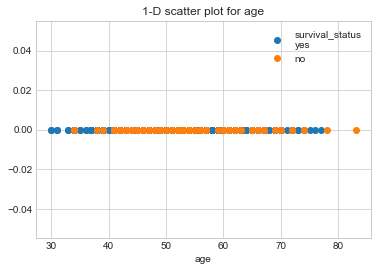

In [91]:
# 1D Scatter plot
plt.plot(pos_surv_status["age"], np.zeros_like(pos_surv_status["age"]), 'o', label = "survival_status\n" "yes")
plt.plot(neg_surv_status["age"], np.zeros_like(neg_surv_status["age"]), 'o', label = "no")
plt.title("1-D scatter plot for age")
plt.xlabel("age")
plt.legend()
plt.show()

Conclusion:
1. Most of the patients whose age was between 38-70 died.
2. However there were only few patients who could survived

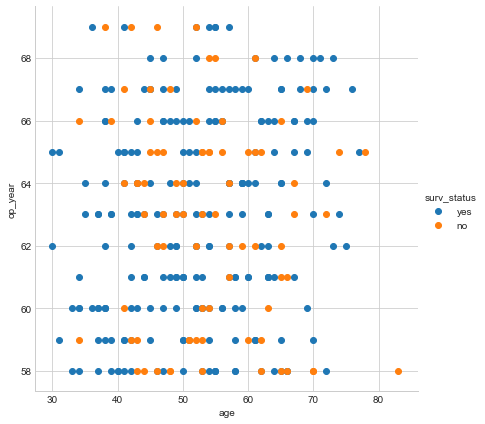

In [59]:
# between age and op_year
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="surv_status", size=6 )\
   .map(plt.scatter, "age", "op_year") \
   .add_legend();
plt.show();


Conclusion:
1. Both the feature age and operation year are non linearly separable    

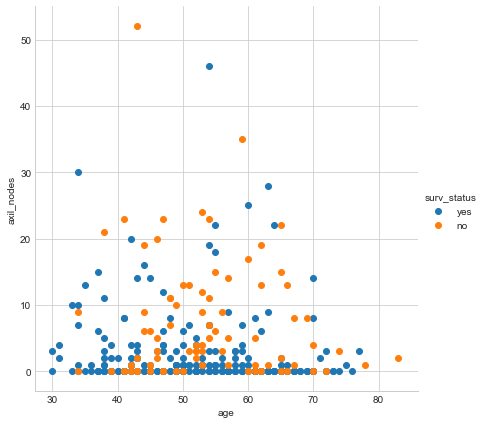

In [92]:
# between age and number of axil_nodes
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="surv_status", size=6 )\
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend();
plt.show();

Conclusion:
    
1. When the number of axil nodes is less than 5, the death ratio is slightly less than the survival ratio 
2. And it is non separable 

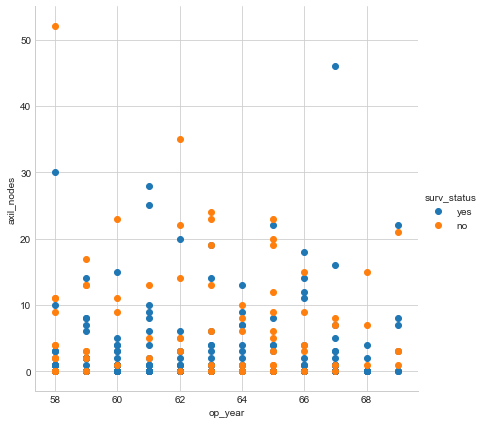

In [93]:
# between year of operation and number of axil_nodes
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="surv_status", size=6 )\
   .map(plt.scatter, "op_year", "axil_nodes") \
   .add_legend();
plt.show();

Conclusion:
Both the faeture are highly messed up and non linearly separable    

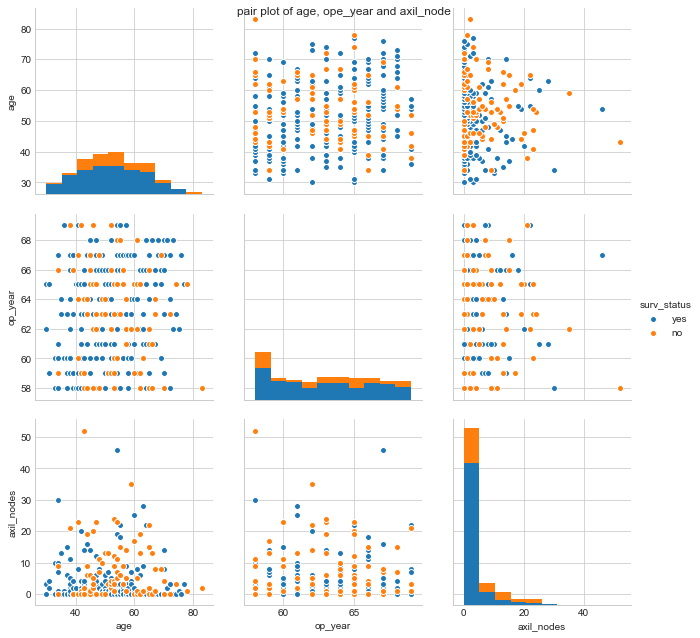

In [95]:
#Here, we are generating pairplot based on survival_status
#We use pair plot where the dimenstionality of data is less.
#In our case we have only 4 dimension data. So, we can use pairplot.

sns.set_style("whitegrid")
sns.pairplot(data, hue = "surv_status", vars = ["age", "op_year", "axil_nodes"], size = 3)
plt.suptitle("pair plot of age, ope_year and axil_node")
plt.show()

Conclusion:
1. All the plot are highly non separable except plot 3 and 7   which are actually same , just rotated by 90 degree
2. If we see closely, When the number of axil nodes is less than 5, the death ratio is slightly less than the survival ratio

# Final Conclusion:

Univariant Analysis :
1.Both the feature "age" and "op_year" don't give us useful insight as the both 

as the distribution is similar for both who survived as well as did not survived

2.However in case of auxil_nodes there is slightly different distribution for person who

survived and who could not..
